#### Search by Lackadaisical Quantum Walk with Symmetry Breaking

https://arxiv.org/abs/2108.13856

In [66]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from scipy import sparse

In [58]:
def initial_condition_clique(NW, NC, weights):
    
    state = np.zeros([NW*NC,1])
    
    for ii in range(NW):
        
        aux_vector = np.zeros([NW,1])
        aux_vector[ii] = 1
        
        state += np.kron(aux_vector/np.sqrt(NW), np.sqrt(weights[ii])*aux_vector/np.sqrt(NW + weights[ii] - 1))
        for jj in set(range(NC)) - set([ii]):
            aux_aux_vector = np.zeros([NC,1])
            aux_aux_vector[jj] = 1
            
            state += np.kron(aux_vector/np.sqrt(NW), aux_aux_vector/np.sqrt(NW + weights[ii] - 1))
            
    return state

def oracle_op(NW, NC, marked):
    O = np.eye(NW)
    O[marked,marked] = -1
    
    return np.kron(O, np.eye(NC))

def diffusion_op(NW,NC,weights):
    C = np.zeros([NW*NC,NW*NC])
    for ii in range(NW):
        si = np.ones([NW,1])/np.sqrt(NW + weights[ii] - 1)
        si[ii] = weights[ii]*si[ii]

#         C_aux = np.zeros([NW,NW])
#         C_aux[ii,ii] = 1
        
        C[ii*NC:(ii+1)*NC,ii*NC:(ii+1)*NC] = 2*si@(si.T) - np.eye(NC)
        
#         C += np.kron(C_aux, 2*si@(si.T) - np.eye(NC))
        
    return C


def ket2pos(positions,NW,NC):
    p = positions[1]*NC + positions[0]
    return p

def shift_op(NW,NC):

    S = np.zeros([NW*NC,NW*NC])
    for u in range(NW):
        for v in range(NC):

            S[ket2pos([u,v],NW,NC), ket2pos([v,u],NW,NC)] = 1
            
    return S



def searching_evolution(U, steps, initial, marked, NC):
    final = np.zeros(steps)
    
    for t in range(steps):
        initial = U@initial
        
        for m in marked:
            final[t]+=np.sum(np.abs(initial[m*NC:(m+1)*NC])**2)
            
            
    return final

In [82]:
start = time.time()
NW = 100
NC = NW
w = [0]*NW
marked = [0]
steps = 20

i_state = initial_condition_clique(NW, NC, w)

Q = oracle_op(NW,NC,marked)


C = diffusion_op(NW,NC,w)
end = time.time()
print(end - start)

S = shift_op(NW,NC)


prob = searching_evolution(S@C@Q, steps, i_state, marked, NC)
end = time.time()
print(end - start)

2.698834180831909
31.571879148483276


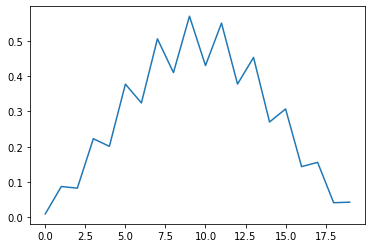

In [83]:
plt.plot(prob)